#  Building models with sklearn pipelines
<ul>
    <li>In this notebook, I will conduct modelling. I have conducted all the necessary preprocessing on the raw data and all the features are numeric.</li>
    <li>Since the problem is a regression problem, I will use tree-based algorithms for modelling. I am going to build Linear Regression model and a Random Forest Regressor.</li>
    <li>Also, to ensure that modelling is modular, I am going to define an sklearn pipeline to streamline the whole process of loading, preprocessing and modelling.</li>

#### Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from load_data import LoadData #for loading the dataset from source files
from plot import Plot # for visualization

In [2]:
#initialize the load and plot objects
loader = LoadData()
plot = Plot()

#### Load the processed dataset

In [3]:
train_df = loader.read_csv('../data/processed/train.csv')
train_df.drop('Unnamed: 0', axis=1, inplace=True)
train_df.head()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType,StateHoliday
0,1,4,5263.0,1,1,1,1270.0,9.0,2008.0,0,...,2015,7,31,4,31,0,1,0,2,0
1,2,4,6064.0,1,1,1,570.0,11.0,2007.0,1,...,2015,7,31,4,31,0,1,0,0,0
2,3,4,8314.0,1,1,1,14130.0,12.0,2006.0,1,...,2015,7,31,4,31,0,1,0,0,0
3,4,4,13995.0,1,1,1,620.0,9.0,2009.0,0,...,2015,7,31,4,31,0,1,2,2,0
4,5,4,4822.0,1,1,1,29910.0,4.0,2015.0,0,...,2015,7,31,4,31,0,1,0,0,0


### (a) Linear Regression Model

### Import necessary libraries

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Separate the features from the target

In [5]:
X_train = train_df.drop('Sales', axis = 1)
Y_train = train_df['Sales']

### Randomly split the data into train and validation set

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

#verify the split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((813767, 21), (203442, 21), (813767,), (203442,))

### Create a Linear Regression Model object

In [7]:
#create the model object
model_LR = LinearRegression()

In [8]:
#fit the model with the training data
model_LR.fit(x_train, y_train)

LinearRegression()

In [9]:
#Predict the target on train and test data
predict_train = model_LR.predict(x_train)
predict_test = model_LR.predict(x_test)

In [10]:
# get the model accuracy
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ' , mean_squared_error(y_test, predict_test)**(0.5))

RMSE on train data:  2234.1457974911245
RMSE on test data:  2228.0180002769484


### (b) Random Forest Regressor

#### Import the necessary libraries

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Create the RFR model

In [12]:
#create RFR object
model_RFR = RandomForestRegressor()

In [13]:
#fit the model with the training data
model_RFR.fit(x_train, y_train)

RandomForestRegressor()

In [14]:
#predict the target on the train and test dataset
predict_train = model_RFR.predict(x_train)
predict_test = model_RFR.predict(x_test)

In [15]:
#check model accuracy using RMSEb
print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ' , mean_squared_error(y_test, predict_test)**(0.5))

RMSE on train data:  268.8552499678108
RMSE on test data:  722.3005580448857


### Discussion
<ul>
    <li>I have trained two models, a Linear Regression Model and a Random Forest Regression Model</li>
    <li>In order to evaluate the accuracy of each model, I have used <b>Root Mean Squared Error (RMSE)</b> as my loss function.</li>
    <li>RMSE  is the square root of the variance of residuals. It indicates the absolute fit of the model to the data-how close the observed data points are to the model's predicted values. RMSE is an absolute measure of fit. RMSE can be interpreted as the standard deviation of the unexplained variance. </li>
    <li><em>Lower values of RMSE indicates better fit</em></li>
    <li>The Random Forest Regressor is performing better than the Linear Regressor since it has lower RMSE values</li>
</ul>

### Feature Importance
After the preprocessing and the encoding steps, I had a total of 21 features all of which may not be useful in forecasting the sales. I am going to select the top 7 features which had a major contribution in forecasting the sales

#### Plotting the feature importance

<AxesSubplot:>

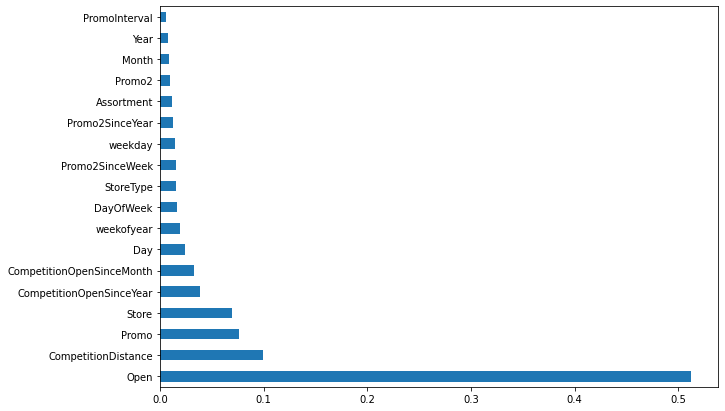

In [21]:
# plot the 10 most important features
plt.figure(figsize=(10, 7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = x_train.columns)
feat_importances.nlargest(18).plot(kind='barh')

#### Training the Random Forest Regressor with only n Select Features
I am going to train the same Random Forest model using the n most important features and observe the change in RMSE values for the train and the validation dataset

##### <ul><li>Training with 7 features</li></ul>

In [17]:
# train data with 7 most important features
train_x_if = x_train[['Open',
                      'CompetitionDistance',
                      'Promo',
                      'Store',
                      'CompetitionOpenSinceYear',
                      'CompetitionOpenSinceMonth',
                      'Day']]

# test data with 7 most important features
test_x_if = x_test[['Open',
                    'CompetitionDistance',
                    'Promo',
                    'Store',
                    'CompetitionOpenSinceYear',
                    'CompetitionOpenSinceMonth',
                    'Day']]

# Create an object of the RandomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10, random_state=11)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, y_train)

# Predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Get the Root Mean Squared Error on the train and test data
print(f'RMSE on the train data: {mean_squared_error(y_train, predict_train_with_if)**(0.5)}')
print(f'RMSE on the test data: {mean_squared_error(y_test, predict_test_with_if)**(0.5)}')

RMSE on the train data: 2108.010873686602
RMSE on the test data: 2106.604917761364


##### <ul><li>Training with 10 features</li></ul>

In [18]:
# train data with 10 most important features
train_x_if = x_train[['Open',
                      'CompetitionDistance',
                      'Promo',
                      'Store',
                      'CompetitionOpenSinceYear',
                      'CompetitionOpenSinceMonth',
                      'Day',
                      'weekofyear',
                      'StoreType',
                      'weekday']]

# test data with 10 most important features
test_x_if = x_test[['Open',
                    'CompetitionDistance',
                    'Promo',
                    'Store',
                    'CompetitionOpenSinceYear',
                    'CompetitionOpenSinceMonth',
                    'Day',
                    'weekofyear',
                    'StoreType',
                    'weekday']]

# Create an object of the RandomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10, random_state=2)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, y_train)

# Predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Get the Root Mean Squared Error on the train and test data
print(f'RMSE on the train data: {mean_squared_error(y_train, predict_train_with_if)**(0.5)}')
print(f'RMSE on the test data: {mean_squared_error(y_test, predict_test_with_if)**(0.5)}')

RMSE on the train data: 2039.181144867049
RMSE on the test data: 2036.676861118751


##### <ul><li>Training with 15 features</li></ul>

In [20]:
# train data with 15 most important features
train_x_if = x_train[['Open',
                      'CompetitionDistance',
                      'Promo',
                      'Store',
                      'CompetitionOpenSinceYear',
                      'CompetitionOpenSinceMonth',
                      'Day',
                      'weekofyear',
                      'StoreType',
                      'weekday',
                      'DayOfWeek',
                      'StoreType',
                      'Promo2SinceWeek',
                      'Assortment',
                      'Promo2']]

# test data with 15 most important features
test_x_if = x_test[['Open',
                      'CompetitionDistance',
                      'Promo',
                      'Store',
                      'CompetitionOpenSinceYear',
                      'CompetitionOpenSinceMonth',
                      'Day',
                      'weekofyear',
                      'StoreType',
                      'weekday',
                      'DayOfWeek',
                      'StoreType',
                      'Promo2SinceWeek',
                      'Assortment',
                      'Promo2']]

# Create an object of the RandomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10, random_state=11)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, y_train)

# Predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Get the Root Mean Squared Error on the train and test data
print(f'RMSE on the train data: {mean_squared_error(y_train, predict_train_with_if)**(0.5)}')
print(f'RMSE on the test data: {mean_squared_error(y_test, predict_test_with_if)**(0.5)}')

RMSE on the train data: 1873.0500232080428
RMSE on the test data: 1872.4301448816454


##### <ul><li>Training with 18 features</li></ul>

In [22]:
# train data with 18 most important features
train_x_if = x_train[['Open',
                      'CompetitionDistance',
                      'Promo',
                      'Store',
                      'CompetitionOpenSinceYear',
                      'CompetitionOpenSinceMonth',
                      'Day',
                      'weekofyear',
                      'StoreType',
                      'weekday',
                      'DayOfWeek',
                      'StoreType',
                      'Promo2SinceWeek',
                      'Assortment',
                      'Promo2',
                      'Month',
                      'Year',
                      'PromoInterval']]

# test data with 18 most important features
test_x_if = x_test[['Open',
                      'CompetitionDistance',
                      'Promo',
                      'Store',
                      'CompetitionOpenSinceYear',
                      'CompetitionOpenSinceMonth',
                      'Day',
                      'weekofyear',
                      'StoreType',
                      'weekday',
                      'DayOfWeek',
                      'StoreType',
                      'Promo2SinceWeek',
                      'Assortment',
                      'Promo2',
                      'Month',
                      'Year',
                      'PromoInterval']]

# Create an object of the RandomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10, random_state=11)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, y_train)

# Predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Get the Root Mean Squared Error on the train and test data
print(f'RMSE on the train data: {mean_squared_error(y_train, predict_train_with_if)**(0.5)}')
print(f'RMSE on the test data: {mean_squared_error(y_test, predict_test_with_if)**(0.5)}')

RMSE on the train data: 1868.650387021928
RMSE on the test data: 1867.5940773583732


From the analysis, all the 21 features are necessary in order to get the same accuracy. Dropping some of the features results in a model that is performing so poorly. As a result, I'm going to maintain all the features for my model.